<a href="https://colab.research.google.com/github/budhathoki10/Concept_and_Technology_of_AI/blob/master/worksheet2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Problem 1 - Data Read, Write and Inspect:
• Dataset for the Task: "bank.csv"

In [2]:
#1. Load the provided dataset and import in pandas DataFrame.
df=pd.read_csv("/content/drive/MyDrive/bank.csv")

#2. Check info of the DataFrame and identify following:
# df.head()
# df.tail()
# df.info()

#a
print("Columns with dtype = object:")
object_cols = df.select_dtypes(include='object').columns
print(object_cols)

#b
for col in object_cols:
    print(f" \n unique in column {col}: ")
    print(df[col].unique())


#c
total_val= df.isnull().sum();
print(total_val)

#3
drop_column= df.drop(columns=object_cols)
drop_column.to_csv("banknumericdata.csv",index=True)
print("sucessfully written")


#4
new_csv= pd.read_csv("/content/banknumericdata.csv")
print(new_csv.describe())

Columns with dtype = object:
Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')
 
 unique in column job: 
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
 
 unique in column marital: 
['married' 'single' 'divorced']
 
 unique in column education: 
['tertiary' 'secondary' 'unknown' 'primary']
 
 unique in column default: 
['no' 'yes']
 
 unique in column housing: 
['yes' 'no']
 
 unique in column loan: 
['no' 'yes']
 
 unique in column contact: 
['unknown' 'cellular' 'telephone']
 
 unique in column month: 
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
 
 unique in column poutcome: 
['unknown' 'failure' 'other' 'success']
 
 unique in column y: 
['no' 'yes']
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0


Problem 2 - Data Imputations:

In [3]:
df1= pd.read_csv("/content/drive/MyDrive/medical_students_dataset.csv")
# df1.head()
# df1.tail()
# df1.info()
#1. Load the provided dataset and import in pandas DataFrame.
dataset=pd.DataFrame(df1)
# dataset.head()

#2. Check info of the DataFrame and identify column with missing (null) values.
dataset.info()
total_null= dataset.isnull().sum()
print(f"total null is \n {total_null}")

#3. For the column with missing values fill the values using various techniques we discussed above. Tryto explain why did you select the particular methods for particular column.
dataset.ffill(inplace=True)

#4 4. Check for any duplicate values present in Dataset and do necessary to manage the duplicate items.{Hint: dataset.duplicated.sum()}
total_duplicate= dataset.duplicated().sum()
print(f"total duplicates values is {total_duplicate}")
#to remove duplicates we have to drop it
dataset.drop_duplicates(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Student ID      180000 non-null  float64
 1   Age             180000 non-null  float64
 2   Gender          180000 non-null  object 
 3   Height          180000 non-null  float64
 4   Weight          180000 non-null  float64
 5   Blood Type      180000 non-null  object 
 6   BMI             180000 non-null  float64
 7   Temperature     180000 non-null  float64
 8   Heart Rate      180000 non-null  float64
 9   Blood Pressure  180000 non-null  float64
 10  Cholesterol     180000 non-null  float64
 11  Diabetes        180000 non-null  object 
 12  Smoking         180000 non-null  object 
dtypes: float64(9), object(4)
memory usage: 19.8+ MB
total null is 
 Student ID        20000
Age               20000
Gender            20000
Height            20000
Weight            20000
Blood Type

3.2 Exercises - Data Cleaning and Transformations with ”Titanic Dataset”:

In [4]:
ds= pd.read_csv("/content/drive/MyDrive/Titanic-Dataset.csv")
datasets= pd.DataFrame(ds)
selected_columns = datasets[["Name", "Pclass","Sex", "Age", "Fare","Survived"]]

# selected_columns.head()
p1= selected_columns[selected_columns["Pclass"]==1]
pd.DataFrame(p1)
p1.describe().Fare
#or we can also do manually
mean_fare = p1["Fare"].mean()
median_fare = p1["Fare"].median()
mode_fare = p1["Fare"].mode()


print("Mean Fare ", mean_fare)
print("Median Fare:", median_fare)
print("Modee Fare:", mode_fare)

#Problem - 2:
Null_ages= selected_columns["Age"].isnull().sum()
print(f"there are {Null_ages} null values in age column")
# #dropping
p1.dropna(subset=["Age"], inplace=True)




Mean Fare  84.1546875
Median Fare: 60.287499999999994
Modee Fare: 0    26.55
Name: Fare, dtype: float64
there are 177 null values in age column


/tmp/ipython-input-1330284429.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  p1.dropna(subset=["Age"], inplace=True)


In [ ]:
#Problem - 3:
#task1. Use one-hot encoding to convert the ’Embarked’ column into separate binary columns (’Embarked C’,’Embarked Q’, ’Embarked S’).
# Embarked_cols= pd.get_dummies(datasets["Embarked"], prefix="Embarked")
# print(Embarked_cols)

#Add these new columns to the original DataFrame.
# datasets= pd.concat([datasets, Embarked_cols], axis=1)
# datasets.head(2)

#3. Drop the original ’Embarked’ column.
#datasets.drop(columns=("Embarked"),inplace=True)

#4. Print the first few rows of the modified DataFrame to verify the changes.
datasets.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked_S,Embarked_C,Embarked_Q,Embarked_S,Embarked_C,Embarked_Q,Embarked_S,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,True,False,False,True,False,False,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,False,True,False,False,True,False,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,True,False,False,True,False,False,True,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,True,False,False,True,False,False,True,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,True,False,False,True,False,False,True,False,False,True


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


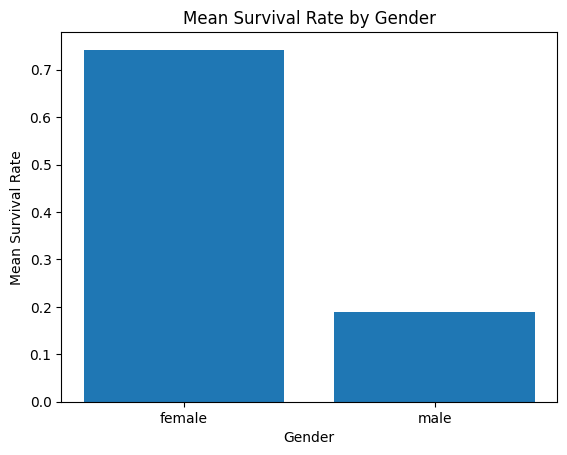

In [21]:
#Problem - 4:Compare the mean survival rates (’Survived’) for the different groups in the ’Sex’ column. Draw a visual-
#ization to show how the survival distributions vary by gender.
mean_survival_by_sex = datasets.groupby('Sex')['Survived'].mean()
print(mean_survival_by_sex)
# visual representation is

# sns.barplot(x='Sex', y='Survived', data=datasets)
plt.bar(mean_survival_by_sex.index, mean_survival_by_sex.values)
plt.title('Mean Survival Rate by Gender')
plt.ylabel('Mean Survival Rate')
plt.xlabel('Gender')

plt.show()



Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64


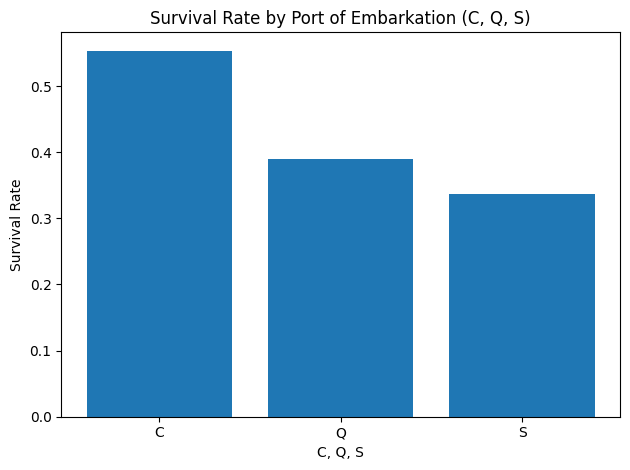

In [22]:
#Problem - 5:Draw a visualization that breaks your visualization from Exercise 3 down by the port of embarkation (’Em-
#barked’). In this instance, compare the ports ’C’ (Cherbourg), ’Q’ (Queenstown), and ’S’ (Southampton).

embarked_survival = datasets.groupby("Embarked")["Survived"].mean()
print(embarked_survival)
plt.bar(embarked_survival.index, embarked_survival.values)

plt.xlabel("C, Q, S")
plt.ylabel("Survival Rate")
plt.title("Survival Rate by Port of Embarkation (C, Q, S)")

plt.tight_layout()
plt.show()